In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import csv
from numpy.random import rand

def import_csv(csvfile):
    """
    Imports the CSV file as an array of lines
    
    :param csvfile: The path of the CSV file
    :return lines: The lines of the CSV file 
    """
    lines = []
    with open(log_path) as csvfile:
        reader = csv.reader(csvfile)
        for line in reader:
            lines.append(line)

    return lines

In [2]:
data_path = './data/'
img_path = data_path + 'IMG/'
log_path = data_path + 'driving_log.csv'

# Store the lines of the CSV file in an array
lines = import_csv(log_path)

In [3]:
# Test to make sure we read that properly
print(lines[0])
print(len(lines))

['/Users/greg/Documents/Udacity/CarND/term1/CarND-Behavioral-Cloning-P3/data/IMG/center_2017_05_28_10_49_49_092.jpg', '/Users/greg/Documents/Udacity/CarND/term1/CarND-Behavioral-Cloning-P3/data/IMG/left_2017_05_28_10_49_49_092.jpg', '/Users/greg/Documents/Udacity/CarND/term1/CarND-Behavioral-Cloning-P3/data/IMG/right_2017_05_28_10_49_49_092.jpg', '-0.04981203', '0', '0', '5.2513']
85292


In [4]:
# Transform to a relative path to the images
for line in lines:
    line[0] = line[0].split('/')[-1]
    line[1] = line[1].split('/')[-1]
    line[2] = line[2].split('/')[-1]
    
# Test
print(lines[0])

['center_2017_05_28_10_49_49_092.jpg', 'left_2017_05_28_10_49_49_092.jpg', 'right_2017_05_28_10_49_49_092.jpg', '-0.04981203', '0', '0', '5.2513']


In [5]:
import numpy as np

# Make lines a numpy array
lines = np.asarray(lines)
print(lines.shape)

# Import the images and the corresponding steering measurements
center_images = lines[:,0]
left_images = lines[:,1]
right_images = lines[:,2]
steer_meas = lines[:,3]
speed = lines[:,6]

# Test to make sure we got that right
print(left_images[0:5])
print(center_images[0:5])
print(right_images[0:5])
print(steer_meas[0:5])
print(speed[0:5])

print(len(left_images))
print(len(center_images))
print(len(right_images))
print(len(steer_meas))
print(len(speed))

(85292, 7)
['left_2017_05_28_10_49_49_092.jpg' 'left_2017_05_28_10_49_49_163.jpg'
 'left_2017_05_28_10_49_49_231.jpg' 'left_2017_05_28_10_49_49_309.jpg'
 'left_2017_05_28_10_49_49_382.jpg']
['center_2017_05_28_10_49_49_092.jpg' 'center_2017_05_28_10_49_49_163.jpg'
 'center_2017_05_28_10_49_49_231.jpg' 'center_2017_05_28_10_49_49_309.jpg'
 'center_2017_05_28_10_49_49_382.jpg']
['right_2017_05_28_10_49_49_092.jpg' 'right_2017_05_28_10_49_49_163.jpg'
 'right_2017_05_28_10_49_49_231.jpg' 'right_2017_05_28_10_49_49_309.jpg'
 'right_2017_05_28_10_49_49_382.jpg']
['-0.04981203' '-0.04981203' '-0.04981203' '-0.04981203' '-0.04981203']
['5.2513' '5.219624' '5.177493' '5.1357' '5.104673']
85292
85292
85292
85292
85292


In [6]:
# Cast speed and steering arrays as float
speed = speed.astype(np.float32)
steer_meas = steer_meas.astype(np.float32)

# Get indices where speed <0.1
slow_speed_ind = np.where(speed < 0.1)[0]

# Sanity check
print(speed[slow_speed_ind[0:5]])
print(len(slow_speed_ind))
print(steer_meas[0:5])

[  1.42000005e-07   2.21999994e-06   2.42000010e-06   2.60999991e-06
   1.93000005e-07]
303
[-0.04981203 -0.04981203 -0.04981203 -0.04981203 -0.04981203]


In [7]:
# Remove rows where speed <0.1, as this does not represent driving behavior
left_images = np.delete(left_images, slow_speed_ind)
center_images = np.delete(center_images, slow_speed_ind)
right_images = np.delete(right_images, slow_speed_ind)
steer_meas = np.delete(steer_meas, slow_speed_ind)
speed = np.delete(speed, slow_speed_ind)

# Sanity check
slow_speed_ind = np.where(speed < 0.1)[0]
print(len(slow_speed_ind)) # Should be 0

print(len(left_images))
print(len(center_images))
print(len(right_images))
print(len(steer_meas))
print(len(speed))

0
84989
84989
84989
84989
84989


In [8]:
# Apply an offset to left and right steering angles
steer_offset = 0.2
left_steer_meas = steer_meas + steer_offset
right_steer_meas = steer_meas - steer_offset

# Test the steering offset
print(left_steer_meas[0:5])
print(right_steer_meas[0:5])

[ 0.15018797  0.15018797  0.15018797  0.15018797  0.15018797]
[-0.24981204 -0.24981204 -0.24981204 -0.24981204 -0.24981204]


In [9]:
# Put the paths for left, right, and center images into one dataset
samples = []
samples.extend(center_images)
samples.extend(left_images)
samples.extend(right_images)

len_nonflipped = len(samples)

# Also add the images again, this time to be flipped
samples.extend(center_images)
samples.extend(left_images)
samples.extend(right_images)

len_total_samples = len(samples)

# Create a binary array that shows which images should be flipped
zero_vals = np.zeros(len_nonflipped)
one_vals = np.ones(len_nonflipped)
flip_images = np.concatenate((zero_vals, one_vals))

# Test that
print(len_total_samples)
print(len_nonflipped)
print(flip_images.shape)
print(flip_images[0], flip_images[len_nonflipped-1], flip_images[len_nonflipped], flip_images[-1])
print(samples[0], samples[46000], samples[95000])

509934
254967
(509934,)
0.0 0.0 1.0 1.0
center_2017_05_28_10_49_49_092.jpg center_2017_05_29_10_31_44_127.jpg left_2017_05_28_11_12_31_673.jpg


In [10]:
# Put the angles for left, right, and center images into one dataset
meas = []
meas.extend(steer_meas)
meas.extend(left_steer_meas)
meas.extend(right_steer_meas)

# Also add the negative steering angles here
meas.extend(np.negative(steer_meas))
meas.extend(np.negative(left_steer_meas))
meas.extend(np.negative(right_steer_meas))

# Test that
print(len(meas))
print(meas[0], meas[46000], meas[95000])

509934
-0.049812 -0.136264 0.18182


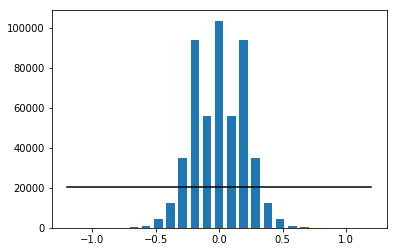

In [11]:
# Generate a histogram to see the distribution of steering angles
plt.figure()
n_bins = 25
avg_samples_per_bin = len(meas) / n_bins
hist, bins = np.histogram(meas, n_bins)
width = 0.7 * (bins[1] - bins[0])
center = (bins[:-1] + bins[1:]) / 2
plt.bar(center, hist, align='center', width=width)
plt.plot((np.min(meas), np.max(meas)), (avg_samples_per_bin, avg_samples_per_bin), 'k-')
plt.show()
plt.close()

In [12]:
# Because center bins are overrepresented, the model knows how to drive in a straight line 
# well but could be confused at corners

# Get the keep probability for each bin. Keep all that fall below the avg. Bring those above 
# the keep prob down to avg
keep_prob = []
target = avg_samples_per_bin * 0.5

for i in range(n_bins):
    if hist[i] < target:
        keep_prob.append(1.0)
    else:
        keep_prob.append(1.0 / (hist[i] / target))
        
remove_list = []

for i in range(len(meas)):
    for j in range(n_bins):
        if meas[i] > bins[j] and meas[i] <= bins[j+1]:
            if rand() > keep_prob[j]:
                remove_list.append(i)
                
print(len(keep_prob))
print(len(remove_list))

25
406101


In [13]:
# Generate a new dataset for the truncated histogram
samples_trunc = np.delete(samples, remove_list)
meas_trunc = np.delete(meas, remove_list)
flip_trunc = np.delete(flip_images, remove_list)

print(len(samples))
print(len(meas))
print(len(samples_trunc))
print(len(meas_trunc))
print(len(flip_trunc))

509934
509934
103833
103833
103833


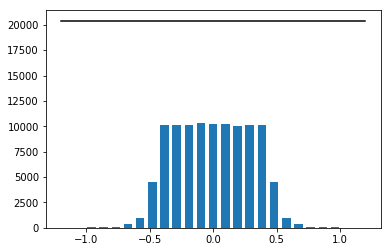

In [14]:
# Get a histogram of the new distribution
plt.figure()
hist, bins = np.histogram(meas_trunc, n_bins)
plt.bar(center, hist, align='center', width=width)
plt.plot((np.min(meas_trunc), np.max(meas_trunc)), (avg_samples_per_bin, avg_samples_per_bin), 'k-')
plt.show()
plt.close()

In [15]:
from sklearn.utils import shuffle

# Shuffle the datasets in unison
samples, meas, flip_images = shuffle(samples, meas, flip_images)
samples_trunc, meas_trunc, flip_trunc = shuffle(samples_trunc, meas_trunc, flip_trunc)

# Test the output
print(samples[0:10])
print(meas[0:10])
print(flip_images[0:10])
print(samples_trunc[0:10])
print(meas_trunc[0:10])
print(flip_trunc[0:10])

['left_2017_05_28_11_48_29_875.jpg', 'right_2017_05_28_12_26_31_729.jpg', 'right_2017_05_29_10_42_43_359.jpg', 'center_2017_05_28_11_05_02_510.jpg', 'right_2017_05_28_12_24_53_568.jpg', 'right_2016_12_01_13_44_20_054.jpg', 'right_2017_05_28_11_33_50_748.jpg', 'left_2017_05_28_12_08_13_362.jpg', 'right_2017_05_28_12_20_35_554.jpg', 'center_2017_05_29_10_55_20_310.jpg']
[-0.048002794, 0.15186208, 0.37211001, -0.02465637, 0.2239368, -0.28824025, -0.27893269, 0.21198308, 0.18675399, 0.259516]
[ 0.  1.  1.  0.  1.  0.  0.  0.  1.  0.]
['right_2017_05_28_11_45_31_470.jpg' 'right_2017_05_28_12_13_48_224.jpg'
 'left_2017_05_29_10_55_21_671.jpg' 'right_2017_05_28_12_26_45_522.jpg'
 'right_2017_06_05_08_56_34_060.jpg' 'right_2017_05_29_11_00_31_057.jpg'
 'center_2016_12_01_13_46_24_821.jpg' 'center_2017_05_28_11_55_27_615.jpg'
 'right_2017_05_28_10_50_14_937.jpg' 'right_2017_05_28_11_20_30_547.jpg']
[-0.39730972  0.3931244  -0.3590402   0.18475682  0.42136401 -0.13142034
 -0.2781274  -0.03428983

In [16]:
# Separate the data into training and validation sets
# Note: samples=X_, meas=y_, flip=z_
# X_train, X_valid, y_train, y_valid = train_test_split(samples, meas, test_size=0.20, random_state=42)
# X_train_tr, X_valid_tr, y_train_tr, y_valid_tr = train_test_split(samples_trunc, meas_trunc, test_size=0.20, 
#                                                                   random_state=42)

split = 0.8
len_full = len(samples)
len_trunc = len(samples_trunc)
split_full = int(split*len_full)
split_trunc = int(split*len_trunc)

X_train = samples[0:split_full]
X_valid = samples[split_full:-1]
y_train = meas[0:split_full]
y_valid = meas[split_full:-1]
z_train = flip_images[0:split_full]
z_valid = flip_images[split_full:-1]

X_train_tr = samples_trunc[0:split_trunc]
X_valid_tr = samples_trunc[split_trunc:-1]
y_train_tr = meas_trunc[0:split_trunc]
y_valid_tr = meas_trunc[split_trunc:-1]
z_train_tr = flip_trunc[0:split_trunc]
z_valid_tr = flip_trunc[split_trunc:-1]

# Make sure we did that properly
print(len(X_train), len(y_train), len(z_train))
print(len(X_valid), len(y_valid), len(z_valid))
print(X_train[0:5])
print(y_train[0:5])
print(z_train[0:5])
print(X_valid[0:5])
print(y_valid[0:5])
print(z_valid[0:5])
print(len(X_train_tr), len(y_train_tr), len(z_train_tr))
print(len(X_valid_tr), len(y_valid_tr), len(z_valid_tr))
print(X_train_tr[0:5])
print(y_train_tr[0:5])
print(z_train_tr[0:5])
print(X_valid_tr[0:5])
print(y_valid_tr[0:5])
print(z_valid_tr[0:5])

407947 407947 407947
101986 101986 101986
['left_2017_05_28_11_48_29_875.jpg', 'right_2017_05_28_12_26_31_729.jpg', 'right_2017_05_29_10_42_43_359.jpg', 'center_2017_05_28_11_05_02_510.jpg', 'right_2017_05_28_12_24_53_568.jpg']
[-0.048002794, 0.15186208, 0.37211001, -0.02465637, 0.2239368]
[ 0.  1.  1.  0.  1.]
['right_2017_06_05_08_27_50_654.jpg', 'right_2017_06_04_14_57_46_144.jpg', 'right_2016_12_01_13_33_03_574.jpg', 'right_2017_05_28_12_27_09_773.jpg', 'center_2017_05_28_12_44_24_634.jpg']
[0.19556509, -0.26396853, 0.042554796, -0.17717928, 0.08912418]
[ 1.  0.  1.  0.  1.]
83066 83066 83066
20766 20766 20766
['right_2017_05_28_11_45_31_470.jpg' 'right_2017_05_28_12_13_48_224.jpg'
 'left_2017_05_29_10_55_21_671.jpg' 'right_2017_05_28_12_26_45_522.jpg'
 'right_2017_06_05_08_56_34_060.jpg']
[-0.39730972  0.3931244  -0.3590402   0.18475682  0.42136401]
[ 0.  1.  1.  1.  1.]
['center_2017_06_04_14_56_10_664.jpg' 'right_2017_06_04_14_54_10_203.jpg'
 'right_2017_05_28_11_18_25_873.jpg' 

In [17]:
from keras.models import Sequential, Model
from keras.layers import Flatten, Dense, Lambda, Cropping2D
from keras.layers.convolutional import Convolution2D
from keras.layers.pooling import MaxPooling2D
from keras.layers.core import Dropout
from keras.regularizers import l2, activity_l2
from keras.optimizers import Adam

def nvidia_model(): 
    """
    NVIDIA model
    """
    model = Sequential()
#     model.add(Lambda(lambda x: x / 127.5 - 1.0, input_shape=(66, 200, 3)))
    model.add(Lambda(lambda x: x / 255.0 - 0.5, input_shape=(66, 200, 3)))
    model.add(Convolution2D(24, 5, 5, subsample=(2, 2), border_mode="valid", W_regularizer=l2(0.001), 
                            activation="relu"))
    model.add(Convolution2D(36, 5, 5, subsample=(2, 2), border_mode="valid", W_regularizer=l2(0.001), 
                            activation="relu"))
    model.add(Convolution2D(48, 5, 5, subsample=(2, 2), border_mode="valid", W_regularizer=l2(0.001), 
                            activation="relu"))
    model.add(Convolution2D(64, 3, 3, border_mode="valid", W_regularizer=l2(0.001), activation="relu"))
    model.add(Convolution2D(64, 3, 3, border_mode="valid", W_regularizer=l2(0.001), activation="relu"))
    model.add(Flatten())
    model.add(Dense(100, W_regularizer=l2(0.001)))
    model.add(Dense(50, W_regularizer=l2(0.001)))
    model.add(Dense(10, W_regularizer=l2(0.001)))
    model.add(Dense(1))

    model.compile(loss='mse', optimizer=Adam(lr=1e-4))
    return model

Using TensorFlow backend.


In [18]:
import cv2
import matplotlib.image as mpimg
from numpy.random import randint, uniform

def process_img(image):
    """
    Preprocessing for an image
    
    :param image: The image to be processed
    :return img: The processed image
    """
    # Crop from 160x320x3 to 40x320x3
    img = image[50:140,:,:]
    
    # Apply a minor Gaussian blur
#     img = cv2.GaussianBlur(img, (3,3), 0)
    
    # Scale to match NVIDIA input size 66x200x3
    img = cv2.resize(img, (200, 66), interpolation=cv2.INTER_AREA)
    
    # Convert to YUV color space
#     img = cv2.cvtColor(img, cv2.COLOR_BGR2YUV)
    return img


def random_distort(img, angle):
    """
    Adds random distortion (brightness adjust, vertical horizon shift)
    
    :param img: The image
    :param angle: The steering angle
    :return: The distorted image, the angle
    """
    out_img = img.astype(float)
    
    # Random brightness adjust keeps values in range [0, 255]
    val = randint(-28, 28)
    if val > 0:
        mask = (out_img[:, :, 0] + val) > 255
    else:
        mask = (out_img[:, :, 0] + val) < 0
    out_img[:, :, 0] += np.where(mask, 0, val)
    
    # Random shadow
    h, w = out_img.shape[0:2]
    mid = randint(0, w)
    factor = uniform(0.6, 0.8)
    if rand() > 0.5:
        out_img[:, 0:mid, 0] *= factor
    else:
        out_img[:, mid:w, 0] *= factor
        
    # Random horizon shift
    h, w, _ = out_img.shape
    horizon = 2 * h / 5
    v_shift = randint(-h/8, h/8)
    pts1 = np.float32([[0, horizon], [w, horizon], [0, h], [w, h]])
    pts2 = np.float32([[0, horizon+v_shift], [w, horizon+v_shift], [0, h], [w, h]])
    M = cv2.getPerspectiveTransform(pts1, pts2)
    out_img = cv2.warpPerspective(out_img, M, (w, h), borderMode=cv2.BORDER_REPLICATE)
    
    return (out_img.astype(np.uint8), angle)


def generator(samples, measurements, flip_vals, batch_size=32, validation_flag=False):
    """
    Generator to reduce memory footprint when training
    
    :param samples: The array of images to process
    :param measurements: The array of steering angle measurements
    :param flip_vals: Whether to flip the image
    :param batch_size: The number of samples to process concurrently
    :param validation_flag: Set to true when running test or validation sets. 
                            Applies random distortion when false
    :yield: The generator
    """
    assert len(samples) == len(measurements)
    num_samples = len(samples)
    
    # Shuffle the data
    samples, measurements, flip_vals = shuffle(samples, measurements, flip_vals)

    while 1: 
        for offset in range(0, num_samples, batch_size):
            batch_samples = samples[offset:offset+batch_size]
            batch_meas = measurements[offset:offset+batch_size]
            batch_flip = flip_vals[offset:offset+batch_size]

            images = []
            angles = []
            for i, sample_val in enumerate(batch_samples):
#                 image = cv2.imread(img_path + sample_val, cv2.IMREAD_COLOR)
                image = mpimg.imread(img_path + sample_val)
                angle = batch_meas[i]
                flip = batch_flip[i]
                
                # Preprocess the image
                image = process_img(image)
                
                # Flip the image, if appropriate
                if flip:
                    image = cv2.flip(image, 1)

                images.append(image)
                angles.append(angle)
                
            X_arr = np.array(images)
            y_arr = np.array(angles)
            yield shuffle(X_arr, y_arr)

In [19]:
def plot_results(history, num=0):
    """
    Plot the results 
    
    :param history: The fit model
    :param num: The number for the output file to save to
    """
    # Plot training and validation loss
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model mean squared error loss')
    plt.ylabel('mean squared error loss')
    plt.xlabel('epoch')
    plt.legend(['training set', 'validation set'], loc='upper right')
    plt.savefig('training_validation_loss_plot_' + str(num) + '.jpg')
    plt.show()
    plt.close()

In [20]:
# def process_img_for_vis(img, angle, pred_angle, frame):
#     """
#     Formats an image for visualization
    
#     :param img: The image
#     :param angle: The steering angle
#     :param pred_angle: The steering angle predicted by the model (if any)
#     :param frame: The frame number
#     :return: The processed image
#     """
#     # Convert color and resize
# #     img = cv2.cvtColor(img, cv2.COLOR_YUV2BGR)
#     img = cv2.resize(img, None, fx=3, fy=3, interpolation=cv2.INTER_CUBIC)
    
#     # Plot text of the frame number and steering angle
#     font = cv2.FONT_HERSHEY_SIMPLEX
#     cv2.putText(img, 'frame: ' + str(frame), org=(2,18), fontFace=font, fontScale=0.5, color=(0, 0, 255), thickness=1)
#     cv2.putText(img, 'angle: ' + str(angle), org=(2,34), fontFace=font, fontScale=0.5, color=(0, 0, 255), thickness=1)
    
#     # Apply a line showing the steering angle and (if exists) the predicted angle
#     h, w = img.shape[0:2]
#     cv2.line(img, (int(w/2), int(h)), (int(w/2 + angle * w/4), int(h/2)), (0, 255, 0), thickness=4)
#     if pred_angle != None:
#         cv2.line(img, (int(w/2), int(h)), (int(w/2 + angle * w/4), int(h/2)), (255, 0, 0), thickness=4)
        
#     return img
        
# def gen_vis_data(img_paths, angles, batch_size=16, validation_flag=False):
#     """
#     Generates trining data for visualization
    
#     :param img_paths: The image paths
#     :param angles: The steering angles
#     :param batch_size: The batch size
#     :param validation_flag: Whether this is training or validation data
#     :return: An array of X, array of y
#     """
#     X = []
#     y = []
    
#     img_paths, angles = shuffle(img_paths, angles)
    
#     for i in range(batch_size):
# #         img = cv2.imread(img_path + img_paths[i])
#         img = mpimg.imread(img_path + img_paths[i])
#         ang = angles[i]
#         img = process_img(img)
        
# #         if not validation_flag:
# #             img, ang = random_distort(img, ang)
            
#         X.append(img)
#         y.append(ang)
        
#     return (np.array(X), np.array(y))

In [21]:
# Visualize some of the data
# X_vis, y_vis = gen_vis_data(samples, meas)
# for i in range(len(X_vis)):
#     img = process_img_for_vis(X_vis[i], y_vis[i], None, i)

#     plt.figure()
#     plt.imshow(img)
#     plt.savefig('vis.png')
#     plt.close()

before


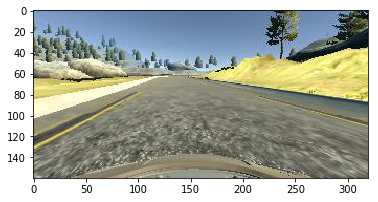

In [22]:
# Import some images and run a test image process pipeline
image = mpimg.imread(img_path + 'center_2017_06_04_14_43_32_322.jpg')
print('before')
plt.imshow(image)


after


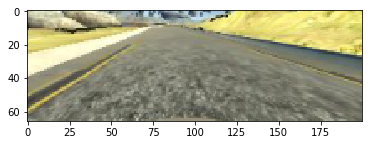

In [23]:
image = process_img(image)
print('after')
plt.imshow(image)

In [24]:
# Compile and train the model using the generator
def train_model(num_epochs=30, truncated=False, batch_size=128, num=0, samples_per_epoch=29696):

    if not truncated:
        train_generator = generator(X_train, y_train, z_train, batch_size, False)
        valid_generator = generator(X_valid, y_valid, z_valid, batch_size, True)
        nb_val_samples = len(X_valid)
    else:
        train_generator = generator(X_train_tr, y_train_tr, z_train_tr, batch_size, False)
        valid_generator = generator(X_valid_tr, y_valid_tr, z_valid_tr, batch_size, True)
        nb_val_samples = len(X_valid_tr)

    model = nvidia_model()
    model.save('model.h' + str(num))

    fit_model = model.fit_generator(train_generator,
                                    samples_per_epoch=samples_per_epoch,
                                    validation_data=valid_generator,
                                    nb_val_samples=nb_val_samples,
                                    nb_epoch=num_epochs,
                                    verbose=1)

    print('Summary for model ' + str(num) + ':')
    print(model.summary())

    plot_results(fit_model, num)

# # Model 0
# train_model(num_epochs=100, num=0)

# # Model 1
# train_model(num_epochs=100, truncated=True, num=1)

# # Model 2
# train_model(num_epochs=100, truncated=False, num=2, samples_per_epoch=59392)

# # Model 3
# train_model(num_epochs=100, truncated=True, num=3, samples_per_epoch=59392)

# Model 4
# train_model(num_epochs=100, num=4)

# Model 5
# train_model(num_epochs=40, num=5, batch_size=512, truncated=False)

# # Model 6
# train_model(num_epochs=40, num=6, batch_size=512, truncated=True)

# # Model 7
# train_model(num_epochs=40, num=7, batch_size=512, truncated=False, samples_per_epoch=59392)

# # Model 8
# train_model(num_epochs=40, num=8, batch_size=512, truncated=True, samples_per_epoch=59392)

In [25]:
# Model 9
# train_model(num_epochs=60, num=9, batch_size=512, truncated=False)

In [ ]:
# Model 10
# train_model(num_epochs=50, num=10)

In [ ]:
# # Model 11
# train_model(num_epochs=20, num=11)

# # Model 12
# train_model(num_epochs=20, truncated=True, num=12)

# # Model 13
# train_model(num_epochs=20, truncated=False, num=13, samples_per_epoch=59392)

# # Model 14
# train_model(num_epochs=20, truncated=True, num=14, samples_per_epoch=59392)

# # Model 15
# train_model(num_epochs=50, num=15)

# # Model 16
# train_model(num_epochs=50, truncated=True, num=16)

# # Model 17
# train_model(num_epochs=50, truncated=False, num=17, samples_per_epoch=59392)

# # Model 18
# train_model(num_epochs=50, truncated=True, num=18, samples_per_epoch=59392)


# Model 19
train_model(num_epochs=20, batch_size=512, num=19)

# Model 20
train_model(num_epochs=20, batch_size=512, truncated=True, num=20)

# Model 21
train_model(num_epochs=20, batch_size=512, num=21, samples_per_epoch=59392)

# Model 22
train_model(num_epochs=20, batch_size=512, truncated=True, num=22, samples_per_epoch=59392)

# Model 23
train_model(num_epochs=40, batch_size=512, num=23)

# Model 24
train_model(num_epochs=40, batch_size=512, truncated=True, num=24)

# Model 25
train_model(num_epochs=40, batch_size=512, num=25, samples_per_epoch=59392)

# Model 26
train_model(num_epochs=40, batch_size=512, truncated=True, num=26, samples_per_epoch=59392)


Epoch 1/20
29696/29696 [==============================] - 447s - loss: 0.0756 - val_loss: 0.0725